### Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Customize

In [2]:
# Specify the input CSV file
file_path = "0503 feedback_sentiment.csv"

# Specify number of days for price change computation
num_days = 5  

# Specify the output CSV file
final_output_path = "0503 final_sentiment_market_data.csv"

# Specify the name of the graphics file to save the heatmap  
heatmap_path = "0503 correlation_heatmap.png"  


### Load and clean data

In [3]:
# Load data
df = pd.read_csv(file_path)

# Attempt to parse the 'Date' column with multiple formats
date_formats = ['%d-%m-%y', '%d/%m/%Y', '%Y-%m-%d']  # Common formats

for fmt in date_formats:
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=fmt, errors='coerce')
        if df['Date'].notna().sum() > 0:
            break  # If successful, exit loop
    except Exception:
        continue

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Ensure 'Close' column is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop unnecessary columns and ensure data types are correct
df = df[['Date', 'vader_sentiment', 'textblob_sentiment', 'Close']].dropna()

### Compute price change and save file

In [4]:
# Compute price change over the specified number of days
df['Price_Change'] = df['Close'].diff(periods=num_days)

# Save the updated dataframe with all fields to a CSV file
df.to_csv(final_output_path, index=False)


### Compute correlation

In [5]:
# Compute correlation between sentiment scores and price change
correlation_matrix = df[['vader_sentiment', 'textblob_sentiment', 'Price_Change']].corr()

### Print and visualize correlation matrix 

Correlation Matrix:
                    vader_sentiment  textblob_sentiment  Price_Change
vader_sentiment            1.000000            0.425124      0.401386
textblob_sentiment         0.425124            1.000000      0.353482
Price_Change               0.401386            0.353482      1.000000


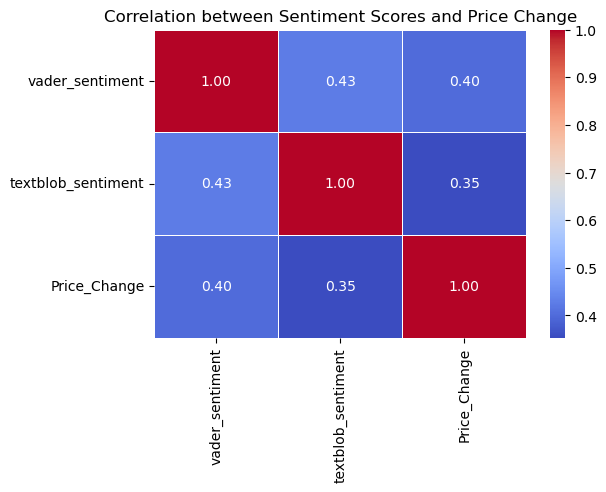

Updated dataset saved to: 0503 final_sentiment_market_data.csv


In [6]:
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Sentiment Scores and Price Change")

# Save the figure before displaying
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")  # High-resolution save


plt.show()

# Print the path to the saved file
print(f"Updated dataset saved to: {final_output_path}")